# Shore Platform Modelling Lab
In this lab you will apply a simple model for how shore platforms develop over time. The model is written in the Python computer programming language, but you don't need any prior knowledge of computer programming. The aims of this lab are
* Understand how coastal processes can be represented numerically
* Run the numerical model to simulate shore platform development
* Explore the controls on how rapidly rock coasts evolve through time
* Create and explain graphs/figures that demonstrate particular controls on shore platform morphology

### Python
The programming language we are using in this lab is called Python. No prior knowledge of programming is required for this lab. Learning how to be a programmer is not the aim! However, this sort of scientific computing is becoming more common place in research and consultancy, so it won't do you any harm to see it in action. Python is multifunctional, for example it can interface with QGIS (software we will use un future labs) to automate workflows.

This notebook file is split into blocks of text and blocks of code. **To run a code block, click in a cell, hold down shift, and press enter.** An asterisk in square brackets `In [*]:` will appear while the code is being executed, and this will change to a number `In [1]:` when the code is finished. *The order in which you execute the code blocks matters, they must be run in sequence.* If you run into any errors, click the "Kernel" menu at the of the page and then "Restart & Clear Output" and then run everything again from the top. 

Inside blocks of python code there are comments indicated by lines that start with `#`. These lines are not computer code but rather comments providing information about what the code is doing to help you follow along. 

Before we get started we need to tell python which tools we want to use (these are called modules):

In [1]:
# import modules <- this is a comment
import numpy as np
import matplotlib.pyplot as plt

# tell python to allow plotting to occur within the page
%matplotlib inline

# Customise figure style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font', size=16)

# Couple of other things for displaying model progress
from ipywidgets import FloatProgress
from IPython.display import display
import os

## Waves
We could devote an entire course to the physics of waves, but for the purposes of this session we will explore some simplified ideas about how ocean waves change as they approach the coast. The transformation of waves as they approach the shore dictates where, and how much wave energy is available to do geomorphic work; transporting sediment, plucking blocks of bedrock from the shore platform, or impacting against shore platforms and cliffs.

We'll start by setting up a basic nearshore topography, a planar sloping surface:

Text(0,0.5,'Elevation (m)')

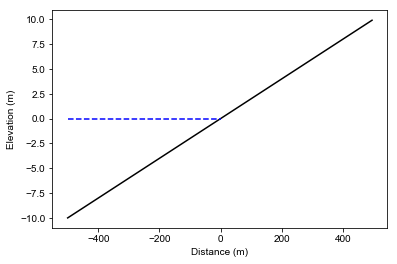

In [3]:
""" SET THE SLOPE OF THE PLATFORM HERE """
SLOPE = 0.02

# set up the geometry wher Z is elevation and X is cross-shore distance
Z = np.arange(-10.,10.,0.1)
X = Z/SLOPE

# find sea level
SLInd = np.argmin(np.abs(0.-Z))

# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# plot the platform and mean sea level at 0m
ax.plot(X,Z,'k-')
ax.plot([X[0],X[SLInd]],[0,0],'b--')
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")

# set no vertical exaggeration on the plot
# ax.axis('equal')
# ax.set_aspect(10.)

### Wave Breaking
An empirical rule of thumb is that waves begin to break when they reach a water depth that is 80% of the wave height. So let's calculate water depth and find the location at which a wave breaks for a particular wave height:

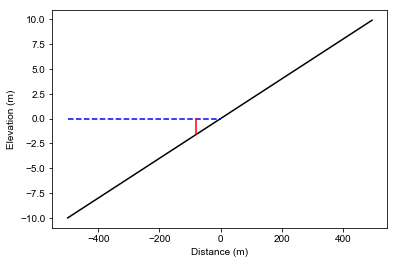

In [4]:
""" SET THE WAVE HEIGHT HERE """
WAVEHEIGHT = 2.

# calculate water depth and find breaking point
WaterDepth = 0-Z[0:SLInd]
BreakingPoint = np.argmin(np.abs(WaterDepth-WAVEHEIGHT*0.8))

#plot the breaking point
ax.plot([X[BreakingPoint],X[BreakingPoint]],[-WaterDepth[BreakingPoint],0],'r-')
fig

### The decay of breaking wave height
Once waves begin to break, wave height decreases. This decrease can be approximated by an exponential function where the height of the breaking wave as it progresses shoreward $H_b$ depends on the wave height offshore before it breaks $H_0$, the distance the wave has travelled since breaking $x_b$ and a decay coefficient that describes how rapidly the breaking wave loses height (and energy) $k$:

$$
\begin{equation}
H_b = H_0 e^{-k x_b}
\end{equation}
$$

Appropriate values for the decay coefficient are somewhere in the region 0.01 to 1. Let's make a plot of how wave height changes after a wave breaks as it moves towards the shore:

(-90.00000000000149, 9.999999999998224)

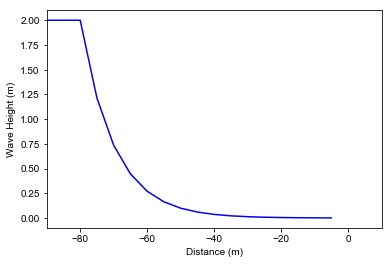

In [27]:
""" SET THE WAVE DECAY COEFFICIENT HERE
    AND THE COLOUR OF THE LINE TO PLOT """
DECAY_COEFFICIENT = 0.1
COLOUR = 'b' #blue

# calculate wave heights
H = np.zeros(SLInd)
H[0:BreakingPoint] = WAVEHEIGHT
H[BreakingPoint:] = WAVEHEIGHT*np.exp(-(X[BreakingPoint:SLInd]-X[BreakingPoint])*DECAY_COEFFICIENT)

# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

ax.plot(X[0:SLInd],H,'-',color=COLOUR)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Wave Height (m)")
ax.set_xlim(X[BreakingPoint]-10.,X[SLInd]+10.)

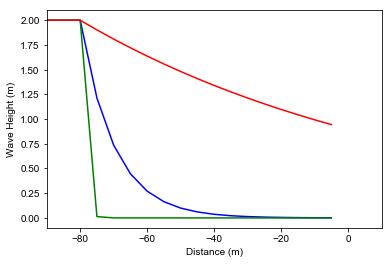

In [26]:
""" SET THE WAVE DECAY COEFFICIENT AGAIN HERE """
DECAY_COEFFICIENT = 0.01

# execute the exponential equation again here for the breaking wave
H[BreakingPoint:] = WAVEHEIGHT*np.exp(-(X[BreakingPoint:SLInd]-X[BreakingPoint])*DECAY_COEFFICIENT)

# plot the new result with a red line
"""
YOU CAN CHANGE THE COLOUR OF THE LINE HERE
"r" = red, "g" = green, "k" = black
or you can use an RedGreenBlue combination
[0,0,0] is black; [0.5,0.5,0.5] is grey
[1,0,1] is purple etc.
"""
COLOUR = "r"
ax.plot(X[0:SLInd],H,'-',color=COLOUR)

# display the updated figure
fig


<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK 1</h3>
<p> Modify parameters above to answer the following questions:
<ol>
    <li>Do waves break closer to the coast on gentler or steeper sloping platforms?
    <li>Do large waves tend to break nearer the coast or further offshore?
    <li>Change the value of the decay coefficient to explore the range of values from $k = 0.01$ up to $k = 1$. Based on your experience of coasts what do you think a realistic value might be?
</ol>
</p>
<p></p>
</font>
</div>

### DOUBLE CLICK ON THIS BLOCK AND YOU CAN TYPE YOUR ANSWERS

Type your answers here once you have double-clicked.

## Tides

The elevations at which wave energy is delivered to the coast vary with the tides. The greater the tidal range, the wider range of elevations can potentially be eroded.

Here I'm going to set a tidal range, and then plot tidal duration.

Loop over the tidal range and calculate breaking wave heights, and then add up all the breaking wave heights at each elevation to show the distribution of wave energy delivered to a shore platform.

Then as the students to vary the tidal range, wave height, decay constant and see how the distribution of wave energy changes.

## Weathering

Some description linking weathering to wetting-drying and therefore tidal duration. Plot the predicted weathering distribution in the intertidal range. Get students thinking about which part of the tidal range will erode the fastest, bringing in what they have learnt about waves up to here.

## MODEL

Set up the modelling using Sunamura's diagrams

define the model as a class with plotting functions. Get them to run a default set up that results in a decreasing rate of cliff retreat through time and link to wave energy dissipation preventing as much energy reaching the coast over time.

Overcome this by introducing sea level rise.

Have them run a weathering limited set up instead.

Bring in uplift!!??